In [1]:
#%% import libraries
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import os
from torch.utils.data import (Dataset,DataLoader)
from skimage import io
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")


In [2]:
#%% import data

class veri(Dataset):
    
    def __init__(self,csv_file,root_dir,transforms=None):
        self.annotions=pd.read_csv(csv_file)
        self.root_dir=root_dir
        self.transform= transforms
        
    def __len__(self):
        return len(self.annotions)
    
    def __getitem__(self,index):
        img_path=os.path.join(self.root_dir,self.annotions.iloc[index,0])
        image=io.imread(img_path)
        y_label=torch.tensor(int(self.annotions.iloc[index,1]))
        
        if self.transform:
            image=self.transform(image)  
            
        return (image,y_label)    
        


In [3]:
#%% Data Preparing

dataset=veri(csv_file=r"C:/Users/cinar/Desktop/armed_forces.csv",
             root_dir=r"C:/Users/cinar/Desktop/armed_forces",
             transforms=torchvision.transforms.Compose([
                 
                 transforms.ToTensor(),
                 transforms.Resize(size=(28,28)),
                 transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5),)
                 
                 ]))





#%% Data Preprocessing

train_set,test_set=torch.utils.data.random_split(dataset,[200,19])
train_loader=DataLoader(dataset=train_set,batch_size=1,shuffle=False)
test_loader=DataLoader(dataset=test_set,batch_size=1,shuffle=False)

print(type(train_loader))

<class 'torch.utils.data.dataloader.DataLoader'>


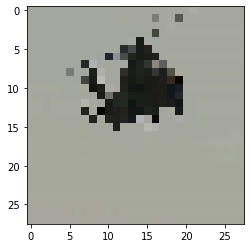

Helicopter
torch.Size([1, 3, 28, 28])


In [4]:
#%% Data Visualization

import matplotlib.pyplot as plt
import numpy as np

batch_size=1
classes=["Aircraft","Battleship","Helicopter","Combat Tank"]

# classes=["Ferrari","Mclaren","Mercedes","Redbull"]

def imshow(img):
    img= img/2 + 0.5
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()
    

dataiter=iter(train_loader)
images,labels= dataiter.next() 

imshow(torchvision.utils.make_grid(images))   

print("".join("%5s" % classes[labels[j]] for j in range (batch_size)))
print(images.size())
 

In [5]:
#%%  Create model architecture

class Net(nn.Module):
    
    def __init__(self):
        super(Net,self).__init__()

        #Conv2d
        self.conv1=nn.Conv2d(in_channels=3, out_channels=4, kernel_size=(5,5))
        self.conv2=nn.Conv2d(in_channels=4, out_channels=8, kernel_size=(3,3))
        self.conv3=nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(2,2))
        self.conv4=nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(2,2))
        
        #MaxPool2d
        self.max=nn.MaxPool2d(kernel_size=(2,2))
        
        #Activation function
        self.func=nn.ELU()
        self.func1=nn.ReLU()
        
        #Linear horizons
        self.fc1=nn.Linear(in_features=32, out_features=50)
        self.fc2=nn.Linear(in_features=50, out_features=50)
        self.fc3=nn.Linear(in_features=50, out_features=100)
        self.fc4=nn.Linear(in_features=100, out_features=4)#4 classımız var
        
    def forward(self,x):
            
        x=self.conv1(x)
        x=self.func(x)
            
        x=self.max(x)
            
        x=self.conv2(x)
        x=self.func(x)
            
        x=self.max(x)
            
        x=self.conv3(x)
        x=self.func(x)
            
        x=self.max(x)
            
        x=self.conv4(x)
        x=self.func(x)
            
            #flatten
        x=x.view(x.size(0),-1)
            
            
            #Neural Network
        x=self.fc1(x)
        x=self.func(x)
        x=self.fc2(x)
        x=self.func(x)
        x=self.fc3(x)
        x=self.func(x)
        x=self.fc4(x)
            
        return x
            
    

In [6]:
#%% Train Model

import time
start=time.time()

model=Net()

optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

error=torch.nn.CrossEntropyLoss()

""" Learning Rate  """
from torch.optim.lr_scheduler import StepLR
lr=StepLR(optimizer, step_size=2, gamma=0.7)


epoch=20

for i in range(epoch):
    
    lr.step()
    
    print("Epoch : ",epoch , " LR : ",lr.get_lr())
    
    for i,(images,label) in enumerate (train_loader):
        
        optimizer.zero_grad()
        
        tahmin= model(images)
        
        loss=error(tahmin,label)
        
        loss.backward() # geri yayılım
        
        optimizer.step()
        
        print("Epoch [{}/{}] , loss:{:.4f}".format(epoch+1,epoch,loss.item()))
        
        

end=time.time()

print("Süre: ", end - start)
      

Epoch :  20  LR :  [0.001]
Epoch [21/20] , loss:1.4302
Epoch [21/20] , loss:1.3906
Epoch [21/20] , loss:1.3679
Epoch [21/20] , loss:1.5335
Epoch [21/20] , loss:1.5282
Epoch [21/20] , loss:1.3214
Epoch [21/20] , loss:1.3567
Epoch [21/20] , loss:1.3529
Epoch [21/20] , loss:1.2921
Epoch [21/20] , loss:1.2788
Epoch [21/20] , loss:1.4901
Epoch [21/20] , loss:1.2533
Epoch [21/20] , loss:1.4763
Epoch [21/20] , loss:1.2235
Epoch [21/20] , loss:1.3385
Epoch [21/20] , loss:1.4435
Epoch [21/20] , loss:1.5934
Epoch [21/20] , loss:1.5994
Epoch [21/20] , loss:1.5974
Epoch [21/20] , loss:1.1791
Epoch [21/20] , loss:1.3952
Epoch [21/20] , loss:1.3804
Epoch [21/20] , loss:1.2133
Epoch [21/20] , loss:1.3304
Epoch [21/20] , loss:1.4341
Epoch [21/20] , loss:1.1995
Epoch [21/20] , loss:1.2503
Epoch [21/20] , loss:1.1735
Epoch [21/20] , loss:1.1650
Epoch [21/20] , loss:1.1693
Epoch [21/20] , loss:1.4392
Epoch [21/20] , loss:1.2129
Epoch [21/20] , loss:1.8012
Epoch [21/20] , loss:1.7739
Epoch [21/20] , loss:

Epoch [21/20] , loss:0.2833
Epoch [21/20] , loss:1.4013
Epoch [21/20] , loss:1.0671
Epoch [21/20] , loss:1.1904
Epoch [21/20] , loss:0.9797
Epoch [21/20] , loss:0.5620
Epoch [21/20] , loss:0.4094
Epoch [21/20] , loss:1.6223
Epoch [21/20] , loss:0.9641
Epoch [21/20] , loss:0.8915
Epoch [21/20] , loss:0.9405
Epoch [21/20] , loss:1.0845
Epoch [21/20] , loss:1.2835
Epoch [21/20] , loss:1.3067
Epoch [21/20] , loss:0.9592
Epoch [21/20] , loss:1.8108
Epoch [21/20] , loss:0.9110
Epoch [21/20] , loss:0.9909
Epoch [21/20] , loss:1.1356
Epoch [21/20] , loss:1.0977
Epoch [21/20] , loss:0.9779
Epoch [21/20] , loss:2.3649
Epoch [21/20] , loss:1.6322
Epoch [21/20] , loss:0.9706
Epoch [21/20] , loss:1.1299
Epoch [21/20] , loss:1.2283
Epoch [21/20] , loss:1.3623
Epoch [21/20] , loss:1.0671
Epoch [21/20] , loss:0.9123
Epoch [21/20] , loss:3.2902
Epoch [21/20] , loss:0.7536
Epoch [21/20] , loss:1.3191
Epoch [21/20] , loss:0.7472
Epoch [21/20] , loss:1.1962
Epoch [21/20] , loss:0.9573
Epoch [21/20] , loss

Epoch [21/20] , loss:1.1590
Epoch [21/20] , loss:1.0568
Epoch [21/20] , loss:1.2993
Epoch [21/20] , loss:1.2065
Epoch [21/20] , loss:1.0254
Epoch [21/20] , loss:1.6130
Epoch [21/20] , loss:0.9361
Epoch [21/20] , loss:1.1122
Epoch [21/20] , loss:2.0614
Epoch [21/20] , loss:0.9802
Epoch [21/20] , loss:1.6578
Epoch [21/20] , loss:1.2800
Epoch [21/20] , loss:0.9807
Epoch [21/20] , loss:0.9108
Epoch [21/20] , loss:0.8935
Epoch :  20  LR :  [0.000343]
Epoch [21/20] , loss:1.1460
Epoch [21/20] , loss:1.3152
Epoch [21/20] , loss:0.8502
Epoch [21/20] , loss:0.2913
Epoch [21/20] , loss:0.3083
Epoch [21/20] , loss:0.9114
Epoch [21/20] , loss:0.7651
Epoch [21/20] , loss:0.8531
Epoch [21/20] , loss:1.0780
Epoch [21/20] , loss:0.8073
Epoch [21/20] , loss:0.3351
Epoch [21/20] , loss:1.0356
Epoch [21/20] , loss:0.4114
Epoch [21/20] , loss:1.0584
Epoch [21/20] , loss:0.7427
Epoch [21/20] , loss:0.4264
Epoch [21/20] , loss:1.2398
Epoch [21/20] , loss:1.1880
Epoch [21/20] , loss:1.2347
Epoch [21/20] , lo

Epoch [21/20] , loss:1.3830
Epoch [21/20] , loss:1.3581
Epoch [21/20] , loss:0.1912
Epoch [21/20] , loss:0.9858
Epoch [21/20] , loss:1.2486
Epoch [21/20] , loss:1.2264
Epoch [21/20] , loss:0.2023
Epoch [21/20] , loss:0.9704
Epoch [21/20] , loss:1.2136
Epoch [21/20] , loss:0.9868
Epoch [21/20] , loss:0.7394
Epoch [21/20] , loss:1.6236
Epoch [21/20] , loss:1.0175
Epoch [21/20] , loss:1.0075
Epoch [21/20] , loss:0.1950
Epoch [21/20] , loss:1.1044
Epoch [21/20] , loss:0.9490
Epoch [21/20] , loss:1.0193
Epoch [21/20] , loss:0.9881
Epoch [21/20] , loss:0.4766
Epoch [21/20] , loss:0.3905
Epoch [21/20] , loss:1.6121
Epoch [21/20] , loss:0.7589
Epoch [21/20] , loss:0.8873
Epoch [21/20] , loss:0.7827
Epoch [21/20] , loss:0.9806
Epoch [21/20] , loss:1.1319
Epoch [21/20] , loss:1.3198
Epoch [21/20] , loss:0.7986
Epoch [21/20] , loss:1.7211
Epoch [21/20] , loss:0.6850
Epoch [21/20] , loss:0.9034
Epoch [21/20] , loss:0.9981
Epoch [21/20] , loss:1.0450
Epoch [21/20] , loss:1.0596
Epoch [21/20] , loss

Epoch [21/20] , loss:0.2666
Epoch [21/20] , loss:0.8718
Epoch [21/20] , loss:0.5417
Epoch [21/20] , loss:0.7828
Epoch [21/20] , loss:0.8309
Epoch [21/20] , loss:0.2628
Epoch [21/20] , loss:0.2379
Epoch [21/20] , loss:1.2145
Epoch [21/20] , loss:0.2159
Epoch [21/20] , loss:0.3945
Epoch [21/20] , loss:1.1141
Epoch [21/20] , loss:0.3063
Epoch [21/20] , loss:0.9713
Epoch [21/20] , loss:1.2543
Epoch [21/20] , loss:1.0929
Epoch [21/20] , loss:0.9173
Epoch [21/20] , loss:1.2126
Epoch [21/20] , loss:1.3378
Epoch [21/20] , loss:0.7276
Epoch [21/20] , loss:1.5889
Epoch [21/20] , loss:0.8041
Epoch [21/20] , loss:0.8003
Epoch [21/20] , loss:1.6172
Epoch [21/20] , loss:1.1480
Epoch [21/20] , loss:0.5866
Epoch [21/20] , loss:1.0531
Epoch [21/20] , loss:0.7450
Epoch [21/20] , loss:0.8598
Epoch [21/20] , loss:0.9093
Epoch :  20  LR :  [0.000343]
Epoch [21/20] , loss:0.3497
Epoch [21/20] , loss:1.0210
Epoch [21/20] , loss:0.8278
Epoch [21/20] , loss:0.1837
Epoch [21/20] , loss:0.2981
Epoch [21/20] , lo

Epoch [21/20] , loss:1.4070
Epoch [21/20] , loss:0.8781
Epoch [21/20] , loss:1.1446
Epoch [21/20] , loss:0.9221
Epoch [21/20] , loss:0.4995
Epoch [21/20] , loss:0.4287
Epoch [21/20] , loss:0.6819
Epoch [21/20] , loss:1.3783
Epoch [21/20] , loss:1.8248
Epoch [21/20] , loss:1.1994
Epoch [21/20] , loss:1.5539
Epoch [21/20] , loss:0.9123
Epoch [21/20] , loss:0.6276
Epoch [21/20] , loss:0.3027
Epoch [21/20] , loss:1.3860
Epoch [21/20] , loss:0.2733
Epoch [21/20] , loss:0.3888
Epoch [21/20] , loss:0.9584
Epoch [21/20] , loss:0.9042
Epoch [21/20] , loss:0.0636
Epoch [21/20] , loss:1.3644
Epoch [21/20] , loss:0.7940
Epoch [21/20] , loss:0.8292
Epoch [21/20] , loss:0.1017
Epoch [21/20] , loss:0.3793
Epoch [21/20] , loss:0.9300
Epoch [21/20] , loss:0.6394
Epoch [21/20] , loss:0.7676
Epoch [21/20] , loss:0.9031
Epoch [21/20] , loss:1.1919
Epoch [21/20] , loss:0.9165
Epoch [21/20] , loss:0.1132
Epoch [21/20] , loss:0.4014
Epoch [21/20] , loss:0.2887
Epoch [21/20] , loss:1.2212
Epoch [21/20] , loss

Epoch [21/20] , loss:0.6834
Epoch [21/20] , loss:0.1813
Epoch [21/20] , loss:0.1644
Epoch [21/20] , loss:1.7456
Epoch [21/20] , loss:1.0416
Epoch [21/20] , loss:0.7380
Epoch [21/20] , loss:3.1365
Epoch [21/20] , loss:0.1097
Epoch [21/20] , loss:0.4530
Epoch [21/20] , loss:0.6024
Epoch [21/20] , loss:1.4945
Epoch [21/20] , loss:1.4187
Epoch [21/20] , loss:0.4849
Epoch [21/20] , loss:0.2862
Epoch [21/20] , loss:0.4243
Epoch [21/20] , loss:0.0203
Epoch [21/20] , loss:0.1743
Epoch [21/20] , loss:0.1827
Epoch [21/20] , loss:0.1861
Epoch [21/20] , loss:0.2273
Epoch [21/20] , loss:0.0170
Epoch [21/20] , loss:0.0236
Epoch [21/20] , loss:1.4623
Epoch [21/20] , loss:0.0135
Epoch [21/20] , loss:0.1042
Epoch [21/20] , loss:0.7666
Epoch [21/20] , loss:0.0607
Epoch [21/20] , loss:0.7617
Epoch [21/20] , loss:1.5341
Epoch [21/20] , loss:0.2415
Epoch [21/20] , loss:0.6451
Epoch [21/20] , loss:0.3445
Epoch [21/20] , loss:1.3582
Epoch [21/20] , loss:0.0927
Epoch [21/20] , loss:1.6101
Epoch [21/20] , loss

Epoch [21/20] , loss:0.4479
Epoch [21/20] , loss:0.1221
Epoch [21/20] , loss:0.6517
Epoch [21/20] , loss:1.4357
Epoch [21/20] , loss:0.4581
Epoch [21/20] , loss:0.2832
Epoch [21/20] , loss:1.5853
Epoch [21/20] , loss:1.9061
Epoch [21/20] , loss:0.4454
Epoch [21/20] , loss:0.1141
Epoch [21/20] , loss:0.4591
Epoch [21/20] , loss:0.0425
Epoch [21/20] , loss:0.8308
Epoch [21/20] , loss:0.7692
Epoch [21/20] , loss:0.3689
Epoch [21/20] , loss:0.6648
Epoch [21/20] , loss:0.2402
Epoch [21/20] , loss:0.1989
Epoch [21/20] , loss:0.4268
Epoch [21/20] , loss:0.6462
Epoch [21/20] , loss:0.8882
Epoch [21/20] , loss:0.7465
Epoch [21/20] , loss:1.9604
Epoch [21/20] , loss:0.4407
Epoch [21/20] , loss:0.3249
Epoch [21/20] , loss:0.0350
Epoch [21/20] , loss:0.7909
Epoch [21/20] , loss:0.1583
Epoch [21/20] , loss:0.2145
Epoch [21/20] , loss:1.0413
Epoch [21/20] , loss:0.6779
Epoch [21/20] , loss:0.0205
Epoch [21/20] , loss:1.1153
Epoch [21/20] , loss:0.5230
Epoch [21/20] , loss:0.5879
Epoch [21/20] , loss

Epoch [21/20] , loss:0.0087
Epoch [21/20] , loss:0.0707
Epoch [21/20] , loss:0.0553
Epoch [21/20] , loss:1.0081
Epoch [21/20] , loss:0.0533
Epoch [21/20] , loss:0.0747
Epoch [21/20] , loss:0.3329
Epoch [21/20] , loss:0.1471
Epoch [21/20] , loss:1.8881
Epoch [21/20] , loss:0.4981
Epoch [21/20] , loss:0.1732
Epoch [21/20] , loss:1.2702
Epoch [21/20] , loss:0.3888
Epoch [21/20] , loss:0.0890
Epoch [21/20] , loss:0.0222
Epoch [21/20] , loss:1.7998
Epoch [21/20] , loss:0.8038
Epoch [21/20] , loss:0.7800
Epoch [21/20] , loss:1.3875
Epoch [21/20] , loss:0.0485
Epoch [21/20] , loss:0.2394
Epoch [21/20] , loss:0.2051
Epoch [21/20] , loss:1.3651
Epoch [21/20] , loss:1.1313
Epoch [21/20] , loss:0.2829
Epoch [21/20] , loss:0.0600
Epoch [21/20] , loss:0.1963
Epoch [21/20] , loss:0.0116
Epoch [21/20] , loss:0.0296
Epoch [21/20] , loss:0.0573
Epoch [21/20] , loss:0.2205
Epoch [21/20] , loss:0.0671
Epoch [21/20] , loss:0.0119
Epoch [21/20] , loss:0.0143
Epoch [21/20] , loss:1.0548
Epoch [21/20] , loss

Epoch [21/20] , loss:0.0341
Epoch [21/20] , loss:0.0111
Epoch [21/20] , loss:0.0351
Epoch [21/20] , loss:0.0319
Epoch [21/20] , loss:0.2584
Epoch [21/20] , loss:0.3107
Epoch [21/20] , loss:0.5135
Epoch [21/20] , loss:0.0885
Epoch [21/20] , loss:0.1976
Epoch [21/20] , loss:0.1508
Epoch [21/20] , loss:0.9432
Epoch [21/20] , loss:0.2317
Epoch [21/20] , loss:0.0121
Epoch [21/20] , loss:1.3252
Epoch [21/20] , loss:0.7381
Epoch [21/20] , loss:0.2732
Epoch [21/20] , loss:0.0444
Epoch [21/20] , loss:0.4336
Epoch [21/20] , loss:1.4410
Epoch [21/20] , loss:0.3275
Epoch [21/20] , loss:0.1860
Epoch [21/20] , loss:1.5620
Epoch [21/20] , loss:1.9668
Epoch [21/20] , loss:0.2620
Epoch [21/20] , loss:0.0517
Epoch [21/20] , loss:0.5024
Epoch [21/20] , loss:0.0210
Epoch [21/20] , loss:0.2338
Epoch [21/20] , loss:0.7585
Epoch [21/20] , loss:0.2186
Epoch [21/20] , loss:0.2047
Epoch [21/20] , loss:0.1889
Epoch [21/20] , loss:0.1037
Epoch [21/20] , loss:0.3774
Epoch [21/20] , loss:0.3601
Epoch [21/20] , loss

Epoch [21/20] , loss:0.1124
Epoch [21/20] , loss:0.2833
Epoch [21/20] , loss:0.0260
Epoch [21/20] , loss:0.2962
Epoch [21/20] , loss:0.6157
Epoch [21/20] , loss:0.1249
Epoch [21/20] , loss:0.0130
Epoch [21/20] , loss:0.0030
Epoch [21/20] , loss:0.2498
Epoch [21/20] , loss:0.0117
Epoch [21/20] , loss:0.1486
Epoch [21/20] , loss:0.2079
Epoch [21/20] , loss:4.8802
Epoch [21/20] , loss:1.6448
Epoch [21/20] , loss:0.0052
Epoch [21/20] , loss:0.0878
Epoch [21/20] , loss:0.0297
Epoch [21/20] , loss:0.9750
Epoch [21/20] , loss:0.0262
Epoch [21/20] , loss:0.0419
Epoch [21/20] , loss:0.2612
Epoch [21/20] , loss:0.1292
Epoch [21/20] , loss:1.7375
Epoch [21/20] , loss:0.3030
Epoch [21/20] , loss:0.1197
Epoch [21/20] , loss:1.2268
Epoch [21/20] , loss:0.2638
Epoch [21/20] , loss:0.0760
Epoch [21/20] , loss:0.0090
Epoch [21/20] , loss:1.9435
Epoch [21/20] , loss:0.6431
Epoch [21/20] , loss:0.8340
Epoch [21/20] , loss:0.6902
Epoch [21/20] , loss:0.0345
Epoch [21/20] , loss:0.1682
Epoch [21/20] , loss

Epoch [21/20] , loss:0.0188
Epoch [21/20] , loss:0.7647
Epoch [21/20] , loss:0.0811
Epoch [21/20] , loss:0.1312
Epoch [21/20] , loss:0.0506
Epoch [21/20] , loss:0.0209
Epoch [21/20] , loss:0.0581
Epoch [21/20] , loss:0.1206
Epoch [21/20] , loss:0.8517
Epoch [21/20] , loss:1.0038
Epoch [21/20] , loss:1.6458
Epoch [21/20] , loss:0.7735
Epoch [21/20] , loss:3.1097
Epoch [21/20] , loss:0.0206
Epoch [21/20] , loss:0.0086
Epoch [21/20] , loss:0.0205
Epoch [21/20] , loss:0.0256
Epoch [21/20] , loss:0.2665
Epoch [21/20] , loss:0.3202
Epoch [21/20] , loss:0.4255
Epoch [21/20] , loss:0.0720
Epoch [21/20] , loss:0.1628
Epoch [21/20] , loss:0.1205
Epoch [21/20] , loss:0.4806
Epoch [21/20] , loss:0.2474
Epoch [21/20] , loss:0.0074
Epoch [21/20] , loss:1.3421
Epoch [21/20] , loss:0.5994
Epoch [21/20] , loss:0.2203
Epoch [21/20] , loss:0.0287
Epoch [21/20] , loss:0.3296
Epoch [21/20] , loss:1.1762
Epoch [21/20] , loss:0.2798
Epoch [21/20] , loss:0.1738
Epoch [21/20] , loss:1.3241
Epoch [21/20] , loss

Epoch [21/20] , loss:1.0836
Epoch [21/20] , loss:0.0513
Epoch [21/20] , loss:0.3365
Epoch [21/20] , loss:0.1668
Epoch [21/20] , loss:0.0398
Epoch [21/20] , loss:0.5903
Epoch [21/20] , loss:0.2509
Epoch [21/20] , loss:0.0998
Epoch [21/20] , loss:0.1509
Epoch [21/20] , loss:0.0026
Epoch [21/20] , loss:0.2473
Epoch [21/20] , loss:1.1489
Epoch [21/20] , loss:0.7376
Epoch [21/20] , loss:1.2448
Epoch [21/20] , loss:0.0705
Epoch [21/20] , loss:0.2424
Epoch [21/20] , loss:0.0154
Epoch [21/20] , loss:0.2909
Epoch [21/20] , loss:0.6154
Epoch [21/20] , loss:0.1077
Epoch [21/20] , loss:0.0084
Epoch [21/20] , loss:0.0021
Epoch [21/20] , loss:0.2604
Epoch [21/20] , loss:0.0075
Epoch [21/20] , loss:0.1094
Epoch [21/20] , loss:0.1313
Epoch [21/20] , loss:4.8727
Epoch [21/20] , loss:1.5052
Epoch [21/20] , loss:0.0034
Epoch [21/20] , loss:0.0879
Epoch [21/20] , loss:0.0254
Epoch [21/20] , loss:0.9243
Epoch [21/20] , loss:0.0202
Epoch [21/20] , loss:0.0388
Epoch [21/20] , loss:0.2227
Epoch [21/20] , loss

Epoch [21/20] , loss:0.2405
Epoch [21/20] , loss:0.1520
Epoch [21/20] , loss:0.0032
Epoch [21/20] , loss:0.0318
Epoch [21/20] , loss:0.0054
Epoch [21/20] , loss:0.1475
Epoch [21/20] , loss:0.0364
Epoch [21/20] , loss:0.0172
Epoch [21/20] , loss:0.2749
Epoch [21/20] , loss:0.5742
Epoch [21/20] , loss:0.5059
Epoch [21/20] , loss:0.0169
Epoch [21/20] , loss:0.0168
Epoch [21/20] , loss:0.0173
Epoch [21/20] , loss:0.6934
Epoch [21/20] , loss:0.0783
Epoch [21/20] , loss:0.1256
Epoch [21/20] , loss:0.0412
Epoch [21/20] , loss:0.0182
Epoch [21/20] , loss:0.0435
Epoch [21/20] , loss:0.0966
Epoch [21/20] , loss:0.8646
Epoch [21/20] , loss:1.0830
Epoch [21/20] , loss:1.4801
Epoch [21/20] , loss:0.6878
Epoch [21/20] , loss:2.6474
Epoch [21/20] , loss:0.0167
Epoch [21/20] , loss:0.0071
Epoch [21/20] , loss:0.0146
Epoch [21/20] , loss:0.0216
Epoch [21/20] , loss:0.2640
Epoch [21/20] , loss:0.3104
Epoch [21/20] , loss:0.3621
Epoch [21/20] , loss:0.0574
Epoch [21/20] , loss:0.1510
Epoch [21/20] , loss

In [7]:
#%% Model Test

def accuracy(loader,model):
    num_correct=0
    num_samples=0
    model.eval()
    
    with torch.no_grad():
        for x,y in loader:
            predict=model(x)
            _,pred=predict.max(1)
            num_correct+=(pred==y).sum()
            num_samples+=pred.size(0)
            
        print(f"Got {(num_correct)} / {(num_samples)} with accuracy {float(num_correct) / float(num_samples) * 100:.2f}")
            
        model.train()




In [8]:
#%% Accuracy

print("Train Accuracy :")
accuracy(train_loader,model)

print("Test Accuracy :")
accuracy(test_loader,model)

"""
Train Accuracy :
Got 171 / 200 with accuracy 85.50
Test Accuracy :
Got 14 / 19 with accuracy 73.68
"""


Train Accuracy :
Got 171 / 200 with accuracy 85.50
Test Accuracy :
Got 14 / 19 with accuracy 73.68


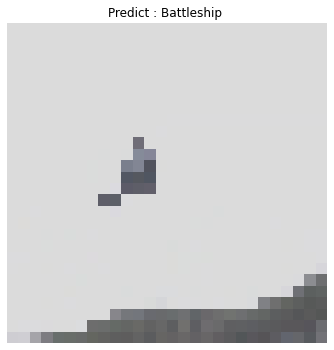

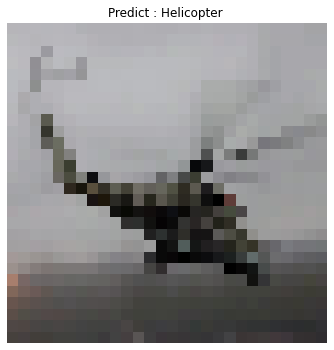

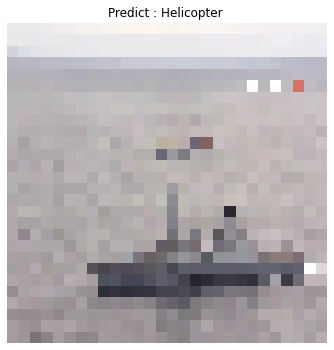

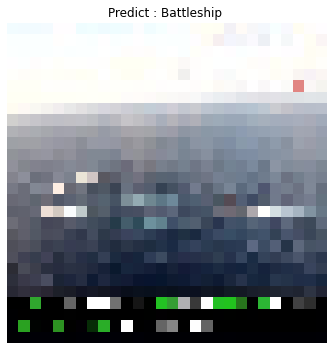

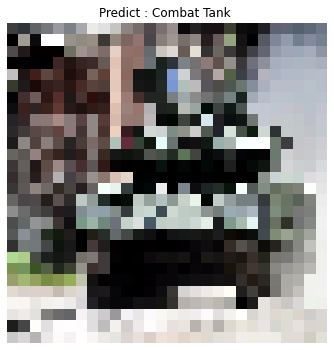

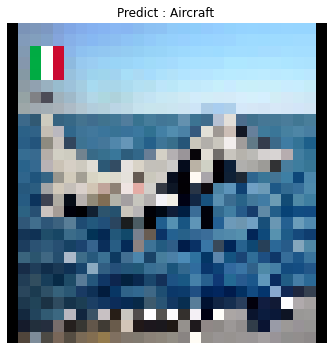

In [9]:
classes=["Aircraft","Battleship","Helicopter","Combat Tank"]

def visualization1(model,image_count=6):
    
    was_training=model.training
    model.eval()
    resim_sayisi=0
    with torch.no_grad():
        for i,(image,labels) in enumerate(test_loader): 
            output=model(image)
            _,predict=torch.max(output,1)
            
            for j in range(image.size()[0]):
                plt.figure(figsize=(40,20))
                resim_sayisi+=1
                ax=plt.subplot(image_count//2,2,resim_sayisi)
                ax.axis("off")
                ax.set_title("Predict : {} ".format(classes[predict[j]]))
                imshow(image.cpu().data[j])
                
                if resim_sayisi== image_count:
                    model.train(mode=was_training)
                    return
    
    
visualization1(model)